In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import mixture

## Get Data

In [86]:
df = pd.read_csv('scrap_results/csv/update_interval_-1408231724.csv')
df.drop(df.columns[0],axis=1 , inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,72,340,333,490,6362,39955,45523,6803,33977,232378,...,16,24,15,16,16,16,15,8,14,10


In [87]:
update_interval =  [int(x) for x in df.columns.values.tolist()]
update_interval = np.array(update_interval)/10

freq = df.iloc[0].tolist()
freq = np.array(freq)
freq = freq/sum(freq)
freq

array([5.61047850e-05, 2.64939263e-04, 2.59484631e-04, 3.81824232e-04,
       4.95748114e-03, 3.11342595e-02, 3.54730296e-02, 5.30112295e-03,
       2.64760039e-02, 1.81076635e-01, 3.94401054e-01, 1.98315610e-01,
       3.13711464e-02, 1.71914412e-02, 2.85168155e-02, 1.90803023e-02,
       4.41357642e-03, 1.48288064e-03, 9.89626069e-04, 1.63171416e-03,
       2.10003327e-03, 1.40651579e-03, 7.30920672e-04, 4.71436041e-04,
       7.95597021e-04, 9.69366008e-04, 8.35337911e-04, 5.36112390e-04,
       4.57409845e-04, 7.38713003e-04, 9.54560579e-04, 7.39492236e-04,
       4.86241470e-04, 3.61564170e-04, 4.03642759e-04, 4.82345305e-04,
       4.09097391e-04, 2.81303158e-04, 2.85199324e-04, 3.29615612e-04,
       3.75590366e-04, 3.05459385e-04, 2.18964508e-04, 1.77665153e-04,
       1.72210521e-04, 1.81561318e-04, 1.58963558e-04, 1.23118834e-04,
       1.08313404e-04, 1.16105736e-04, 1.02858773e-04, 7.71440794e-05,
       6.23386500e-05, 5.61047850e-05, 5.37670857e-05, 4.90916869e-05,
      

Text(0, 0.5, 'Frequency [-]')

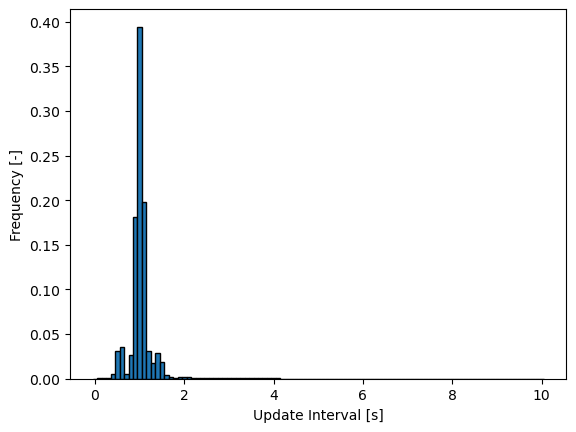

In [88]:
plt.bar(update_interval, freq, width = 0.1, edgecolor = 'black')
plt.xlabel('Update Interval [s]')
plt.ylabel('Frequency [-]')

In [65]:
data = np.concatenate((freq,freq))[:, np.newaxis]
data = data[0:101]*100

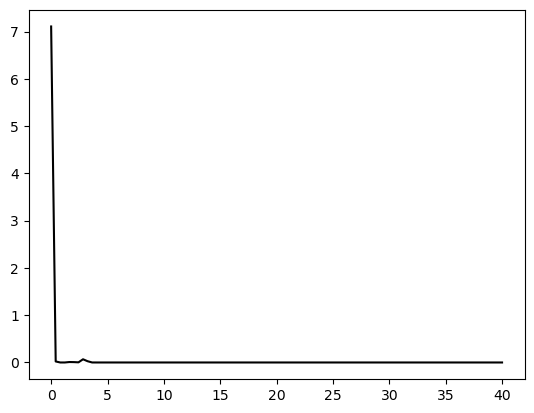

In [84]:
# # Fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=8, covariance_type='full')
clf.fit(data)

# Display the data
x = np.linspace(0, 40, 100)
logprob = clf.score_samples(x.reshape(-1,1))
pdf = np.exp(logprob)
plt.plot(x, pdf, '-k')
# plt.bar(update_interval, freq, width = 0.1, edgecolor = 'black')


## Calculate Probability

(0.0, 2.0)

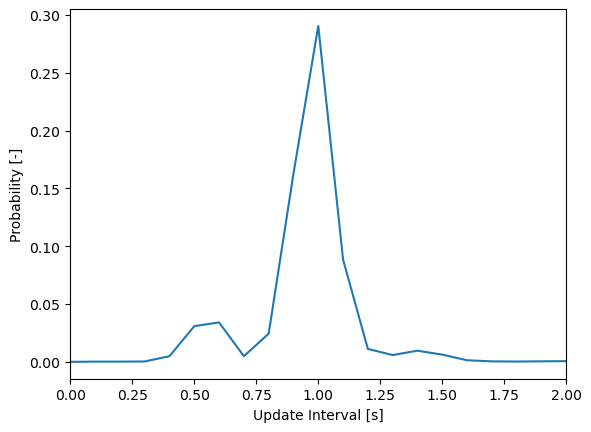

In [81]:
prob = []

for i in range(len(update_interval)):
    if(i == 0):
        prob.append(freq[i])
    else:
        prod = 1
        for j in range(i):
            prod *= (1-freq[j])
            
        prob.append(freq[i] * prod)
        
plt.plot(update_interval, prob)
plt.xlabel('Update Interval [s]')
plt.ylabel('Probability [-]')
plt.xlim([0, 2])

In [82]:
prob

[5.610478503685383e-05,
 0.00026492439831365185,
 0.0002594013286563327,
 0.00038160260906662416,
 0.004952711883448333,
 0.03095010832380279,
 0.03416532154036831,
 0.004924583262515289,
 0.024465025432592,
 0.16289295872091317,
 0.29055023101925653,
 0.08847593644821362,
 0.0112202384237414,
 0.005955817538622881,
 0.009709548890029486,
 0.0063112962585061645,
 0.0014320474952497914,
 0.0004790181082433451,
 0.000319206979815094,
 0.0005257936460265391,
 0.000675597762382157,
 0.00045153731621754424,
 0.00023431927096786612,
 0.00015102296515160263,
 0.0002547467018181166,
 0.00031013983199769607,
 0.0002669996904194831,
 0.00017121486842696642,
 0.00014600181220140182,
 0.0002356838296411109,
 0.0003043242779442648,
 0.00023553310947275718,
 0.0001547565597152581,
 0.00011501943613039736,
 0.0001283588920209639,
 0.00015332448468528167,
 0.00012997823570840014,
 8.933894736079791e-05,
 9.055084949580266e-05,
 0.00010462318400097521,
 0.00011917672035196295,
 9.688740211569321e-05,
 